If you would like to investigate the CNN in different ways, use https://github.com/utkuozbulak/pytorch-cnn-visualizations as a reference.

In [1]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

from visualization_utils import preprocess_image, convert_to_grayscale
from guided_backprop import GuidedBackprop

In [2]:
BASE_DIR = '..'
COUNTRY = 'malawi_2016'
CNN_SAVE_DIR = os.path.join(BASE_DIR, 'models', 'trained_model.pt')

In [3]:
model = torch.load(CNN_SAVE_DIR, map_location=torch.device('cpu'))
model = model.eval()

In [4]:
os.listdir('images/')

['water.png',
 'bad_image.png',
 '2',
 '1',
 '.ipynb_checkpoints',
 'roads.png',
 '3']

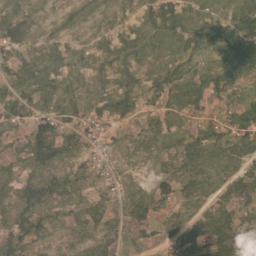

In [21]:
choice = 'roads.png'
image_dir = f'images/{choice}'
image = Image.open(image_dir).convert('RGB')
image

In [22]:
proc_image = preprocess_image(image)

# prediction by model
preds = model(proc_image)
print('prediction:', preds)
target = torch.argmax(preds).item()

prediction: tensor([[ 1.7050,  1.5137, -3.3119]], grad_fn=<AddmmBackward>)


In [23]:
GBP = GuidedBackprop(model)
guided_grads = GBP.generate_gradients(proc_image, target)
grayscale_guided_grads = convert_to_grayscale(guided_grads)

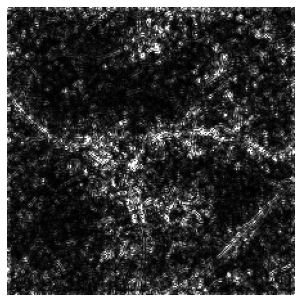

In [24]:
img = np.squeeze(grayscale_guided_grads.transpose(1, 2, 0))
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(img, cmap='gray', vmin=0, vmax=1)
fig.savefig('out.png', bbox_inches='tight', pad_inches=0)